# Advanced Data Modelling

Since now I have learned Ensemble techniques as well as Neural Networks, lets try them out here:

In [44]:
import pandas as pd
import numpy as np

# get the data from the file
file_path = './data/preprocessed_all_tweets.csv'  # Update path as needed
embedded_data = pd.read_csv(file_path)
X = embedded_data['processed_text']
y = embedded_data['hashtag']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# get the results of previous models
merged_results = pd.read_csv('./data/final_results.csv', index_col=0)


## Ensemble best of models and combine them together

Logistic Regression	{'C': 10, 'solver': 'saga', 'max_features': None, 'method': 'tfidf', 'stop_words': 'english'}  
Decision Tree	{'max_depth': None, 'min_samples_split': 5, 'max_features': None, 'method': 'count', 'stop_words': 'english'}  
K-Nearest Neighbors	{'n_neighbors': 5, 'weights': 'distance', 'max_features': None, 'method': 'tfidf', 'stop_words': 'english'}  
Naive Bayes	{'alpha': 0.1, 'max_features': None, 'method': 'tfidf', 'stop_words': 'english'}  

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


hashtags = embedded_data['hashtag'].unique()

# Define pipelines for each model
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, stop_words='english')),
    ('logreg', OneVsRestClassifier(LogisticRegression(max_iter=1000, C = 10, solver = 'saga')))
])

dt_pipeline = Pipeline([
    ('count', CountVectorizer(max_features=None, stop_words='english')),
    ('dt', DecisionTreeClassifier(max_depth = None, min_samples_split = 5, max_features = None))
])

knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, stop_words='english')),
    ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, stop_words='english')),
    ('nb', MultinomialNB(alpha=0.1))
])

# # Combine models using VotingClassifier
# voting_clf = VotingClassifier(
#     estimators=[
#         ('logreg', logreg_pipeline),
#         ('dt', dt_pipeline),
#         ('knn', knn_pipeline),
#         ('nb', nb_pipeline)
#     ],
#     voting='hard'
# )

# # Fit and evaluate the model
# voting_clf.fit(X_train, y_train)
# y_pred = voting_clf.predict(X_test)

# # Print accuracy
# print("Train accuracy:", voting_clf.score(X_train, y_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

# print(classification_report(y_test, y_pred, output_dict=True))
# cm = confusion_matrix(y_test, y_pred, labels=hashtags)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=hashtags, yticklabels=hashtags)
# plt.title(f"Confusion Matrix for Voting Classifier (hard)")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

results = []



### Lets play with Grid Search and see what we can get by playing around with different weights and voting

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'voting': 'hard', 'weights': (1, 1, 1, 1)}
Best Score: 0.6021505376344086
Test Accuracy: 0.6666666666666666
{'#AEWDynamite': {'precision': 0.2857142857142857, 'recall': 0.2857142857142857, 'f1-score': 0.2857142857142857, 'support': 7.0}, '#AskAiah': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, '#BBMAs': {'precision': 0.8181818181818182, 'recall': 1.0, 'f1-score': 0.9, 'support': 9.0}, '#CUTOSHI': {'precision': 0.75, 'recall': 0.8571428571428571, 'f1-score': 0.8, 'support': 7.0}, '#GSWvsHOU': {'precision': 1.0, 'recall': 0.42857142857142855, 'f1-score': 0.6, 'support': 7.0}, '#PMSLive': {'precision': 0.5, 'recall': 0.875, 'f1-score': 0.6363636363636364, 'support': 8.0}, '#RHOSLC': {'precision': 1.0, 'recall': 0.875, 'f1-score': 0.9333333333333333, 'support': 8.0}, '#Survivor47': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.8888888888888888, 'support': 8.0}, '#TNFonPrime': {'precision

/Users/amandeep/Code/GitHub/adchawla/kraftwerk/04_CapstoneProject_GenerationOfRelevantHashTagsForSocialMediaPosts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/04_CapstoneProject_GenerationOfRelevantHashTagsForSocialMediaPosts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/04_CapstoneProject_GenerationOfRelevantHashTagsForSocialMediaPosts/.venv/lib/python3.10/site-packages

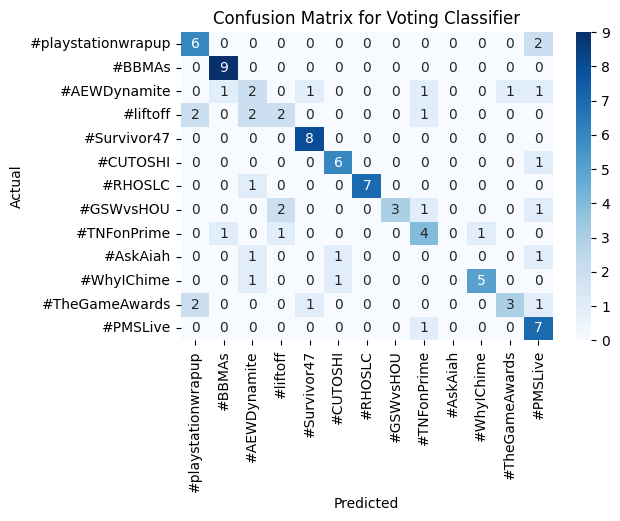

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for weights
param_grid = {
    'weights': [
        (1, 1, 1, 1),  # Equal weights
        (2, 1, 1, 1),  # Logistic Regression gets more weight
        (1, 2, 1, 1),  # Decision Tree gets more weight
        (1, 1, 2, 1),  # KNN gets more weight
        (1, 1, 1, 2),  # Naive Bayes gets more weight
        (2, 1, 2, 4),  # Logistic Regression highly favored
    ], 'voting': [
        'hard', 'soft'
    ]
}

# Define the VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', logreg_pipeline),
        ('dt', dt_pipeline),
        ('knn', knn_pipeline),
        ('nb', nb_pipeline)
    ]
)



# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=voting_clf,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Or another suitable metric
    verbose=1,
    n_jobs=-1,  # Use all processors for speed
)

# Fit the grid search to find the best weights
grid_search.fit(X_train, y_train)

# Evaluate on the test set
best_voting_clf = grid_search.best_estimator_
y_pred = best_voting_clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

results.append({
    'Model': 'Voting Classifier',
    'Best Parameters': grid_search.best_params_,
    'Training Score': grid_search.best_score_,
    'Test Score': report['accuracy'],
    'Mean Fit Time': grid_search.cv_results_['mean_fit_time'].mean(),
    'Mean Test Time': grid_search.cv_results_['mean_score_time'].mean()
})


# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print(report)
cm = confusion_matrix(y_test, y_pred, labels=hashtags)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=hashtags, yticklabels=hashtags)
plt.title(f"Confusion Matrix for Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [47]:
# Print the scores for each combination
pd.DataFrame(grid_search.cv_results_)
results

[{'Model': 'Voting Classifier',
  'Best Parameters': {'voting': 'hard', 'weights': (1, 1, 1, 1)},
  'Training Score': 0.6021505376344086,
  'Test Score': 0.6666666666666666,
  'Mean Fit Time': 0.14346097575293645,
  'Mean Test Time': 0.006518661975860596}]

### Lets play with RandomForest Too

#### GridSearch on RandomForest

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/Users/amandeep/Code/GitHub/adchawla/kraftwerk/04_CapstoneProject_GenerationOfRelevantHashTagsForSocialMediaPosts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/04_CapstoneProject_GenerationOfRelevantHashTagsForSocialMediaPosts/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amandeep/Code/GitHub/adchawla/kraftwerk/04_CapstoneProject_GenerationOfRelevantHashTagsForSocialMediaPosts/.venv/lib/python3.10/site-packages

Best Parameters: {'rf__class_weight': None, 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best Score: 0.5994623655913979
Test Accuracy: 0.6021505376344086
{'#AEWDynamite': {'precision': 0.3333333333333333, 'recall': 0.14285714285714285, 'f1-score': 0.2, 'support': 7.0}, '#AskAiah': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, '#BBMAs': {'precision': 1.0, 'recall': 0.7777777777777778, 'f1-score': 0.875, 'support': 9.0}, '#CUTOSHI': {'precision': 0.8333333333333334, 'recall': 0.7142857142857143, 'f1-score': 0.7692307692307693, 'support': 7.0}, '#GSWvsHOU': {'precision': 0.8, 'recall': 0.5714285714285714, 'f1-score': 0.6666666666666666, 'support': 7.0}, '#PMSLive': {'precision': 0.4, 'recall': 0.5, 'f1-score': 0.4444444444444444, 'support': 8.0}, '#RHOSLC': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8.0}, '#Survivor47': {'precision': 1.0, 'recall': 0.875, 'f1-score': 0.933333333333333

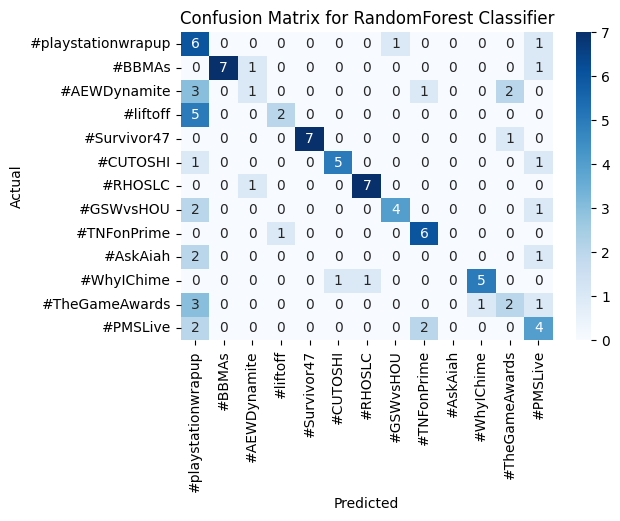

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'rf__class_weight': [None, 'balanced'],  # Handle imbalanced classes
}

# Create the GridSearchCV object
rf_clf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=None, stop_words='english')),
    ('rf', RandomForestClassifier(random_state=42))
])
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all processors for speed
)

# Fit the grid search
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

results.append({
    'Model': 'RandomForest Classifier',
    'Best Parameters': grid_search.best_params_,
    'Training Score': grid_search.best_score_,
    'Test Score': report['accuracy'],
    'Mean Fit Time': grid_search.cv_results_['mean_fit_time'].mean(),
    'Mean Test Time': grid_search.cv_results_['mean_score_time'].mean()
})


# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print(report)
cm = confusion_matrix(y_test, y_pred, labels=hashtags)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=hashtags, yticklabels=hashtags)
plt.title(f"Confusion Matrix for RandomForest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)

# merge the results with the previous results
merged_results = pd.concat([merged_results, results_df])
merged_results.to_csv('./data/final_results.csv', index=False)
merged_results

,Best Parameters,Training Score,Test Score,Mean Fit Time,Mean Test Time
Model,,,,,
Logistic Regression,"{'classifier__estimator__C': 1, 'classifier__e...",0.607527,0.666667,0.098620,0.003018
Decision Tree,"{'classifier__max_depth': None, 'classifier__m...",0.481183,0.505376,0.006460,0.002184
KNN,"{'classifier__n_neighbors': 7, 'classifier__we...",0.564516,0.612903,0.004371,0.003386
Naive Bayes,"{'classifier__alpha': 0.1, 'vectorizer__max_fe...",0.594086,0.677419,0.006892,0.002659
Logistic Regression (BERT),"{'C': 1, 'solver': 'lbfgs'}",0.413978,0.494624,2.951136,0.001399
Decision Tree (BERT),"{'max_depth': 30, 'min_samples_split': 2}",0.172043,0.182796,0.152462,0.001437
KNN (BERT),"{'n_neighbors': 3, 'weights': 'distance'}",0.303763,0.301075,0.000918,0.004298
Voting Classifier,"{'voting': 'hard', 'weights': (1, 1, 1, 1)}",0.602151,0.666667,0.143461,0.006519
RandomForest Classifier,"{'rf__class_weight': None, 'rf__max_depth': No...",0.599462,0.602151,0.089040,0.006421


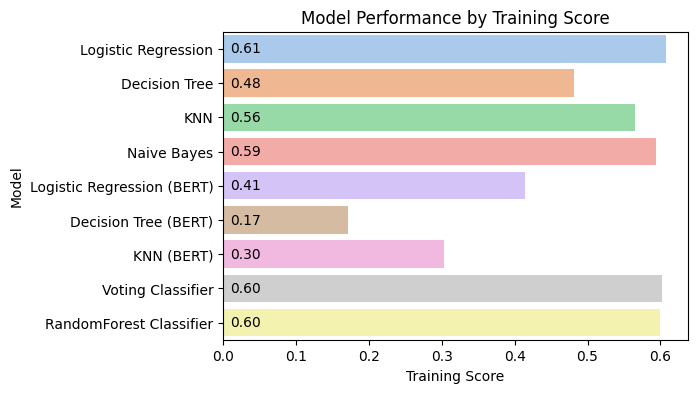

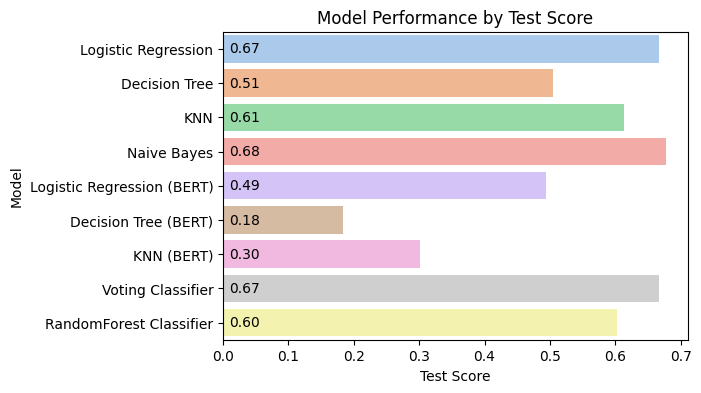

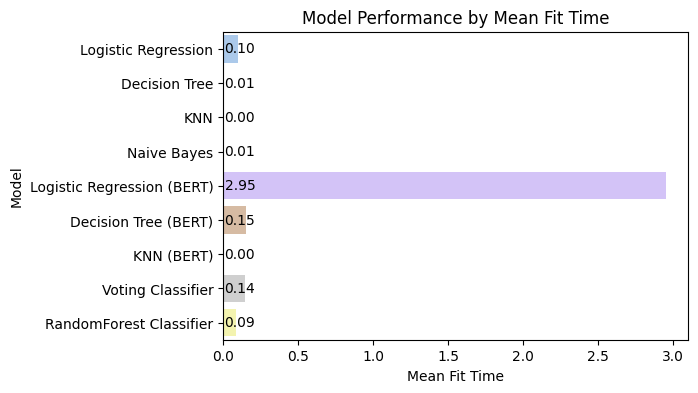

In [54]:
# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns

for parameter in ['Training Score', 'Test Score', 'Mean Fit Time']:

    # Set the figure size
    plt.figure(figsize=(6, 4))

    # Create a barplot of the test scores
    sns.barplot(data=merged_results, x=parameter, y=merged_results.index, palette='pastel', hue=merged_results.index)

    # Add the score values on the bars
    for i in range(merged_results.shape[0]):
        plt.text(0.01, i, f"{merged_results[parameter].iloc[i]:.2f}", va='center')

    # Add labels and title
    plt.xlabel(parameter)
    plt.ylabel('Model')
    #plt.xticks(rotation=75)
    plt.title(f'Model Performance by {parameter}')
    plt.show()
